In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PRAPROSES

### Memuat Dataset

In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!#
data = pd.read_csv("/content/drive/MyDrive/Kuliah/Daming/Projek/data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4383 non-null   object 
 1   stasiun   4383 non-null   object 
 2   pm10      4171 non-null   float64
 3   so2       4208 non-null   float64
 4   co        4233 non-null   float64
 5   o3        4180 non-null   float64
 6   no2       4190 non-null   float64
 7   max       4374 non-null   float64
 8   critical  4273 non-null   object 
 9   categori  4383 non-null   object 
 10  pm25      365 non-null    float64
dtypes: float64(7), object(4)
memory usage: 376.8+ KB


In [ ]:
data.head()

tanggal             stasiun  pm10  so2    co    o3   no2   max critical  \
0  2010-01-01  DKI1 (Bunderan HI)  60.0  4.0  73.0  27.0  14.0  73.0       CO   
1  2010-01-02  DKI1 (Bunderan HI)  32.0  2.0  16.0  33.0   9.0  33.0       O3   
2  2010-01-03  DKI1 (Bunderan HI)  27.0  2.0  19.0  20.0   9.0  27.0     PM10   
3  2010-01-04  DKI1 (Bunderan HI)  22.0  2.0  16.0  15.0   6.0  22.0     PM10   
4  2010-01-05  DKI1 (Bunderan HI)  25.0  2.0  17.0  15.0   8.0  25.0     PM10   

  categori  pm25  
0   SEDANG   NaN  
1     BAIK   NaN  
2     BAIK   NaN  
3     BAIK   NaN  
4     BAIK   NaN

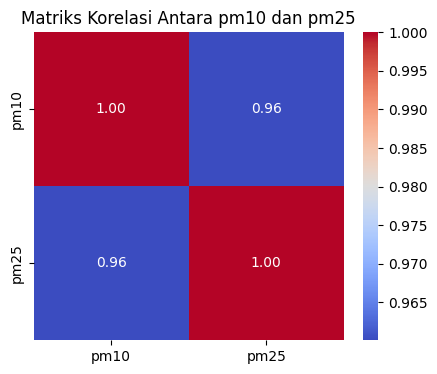

In [ ]:
correlation_matrix = data[['pm10', 'pm25']].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Antara pm10 dan pm25')
plt.show()

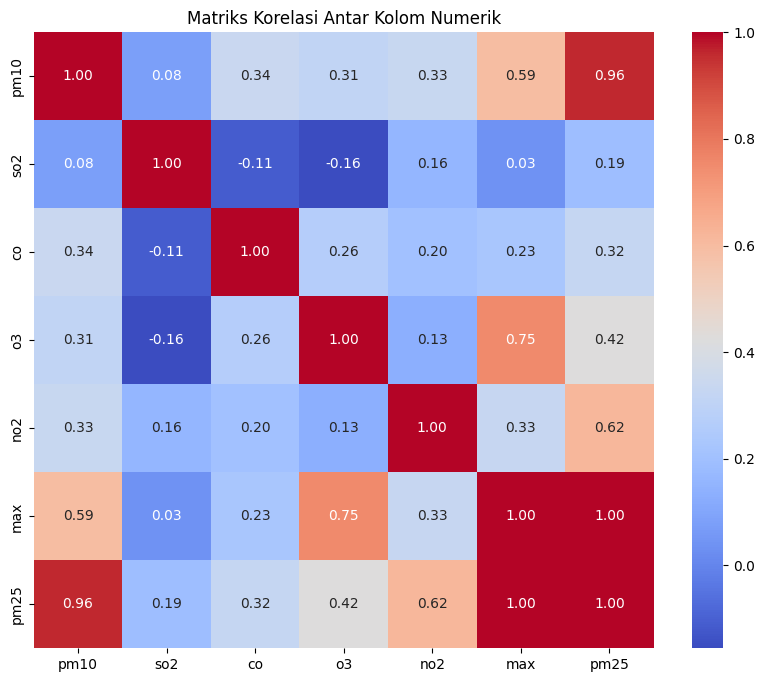

In [ ]:
correlation_matrix = data.select_dtypes(include=np.number).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Antar Kolom Numerik')
plt.show()

### Reduksi data

Menghapus kolom yang tidak diperlukan yaitu 'stasiun', 'max', 'critical', 'pm25' (pm25 dihapus karena memiliki korelasi 0.96 dengan pm10 sedangkan max berkorelasi 0.75 dengan o3 dan 0.59 dengan pm10)


In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!#
data.drop(['stasiun', 'max', 'critical', 'pm25'], axis=1, inplace=True)
data['tanggal'] = pd.to_datetime(data['tanggal'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   4383 non-null   datetime64[ns]
 1   pm10      4171 non-null   float64       
 2   so2       4208 non-null   float64       
 3   co        4233 non-null   float64       
 4   o3        4180 non-null   float64       
 5   no2       4190 non-null   float64       
 6   categori  4383 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 239.8+ KB


In [ ]:
data.head()

tanggal  pm10  so2    co    o3   no2 categori
0 2010-01-01  60.0  4.0  73.0  27.0  14.0   SEDANG
1 2010-01-02  32.0  2.0  16.0  33.0   9.0     BAIK
2 2010-01-03  27.0  2.0  19.0  20.0   9.0     BAIK
3 2010-01-04  22.0  2.0  16.0  15.0   6.0     BAIK
4 2010-01-05  25.0  2.0  17.0  15.0   8.0     BAIK

### Melakukan pengecekan missing value

In [ ]:
data.isnull().sum()

tanggal       0
pm10        212
so2         175
co          150
o3          203
no2         193
categori      0
dtype: int64

### Melihat sifat dataset linier atau nonlinier

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


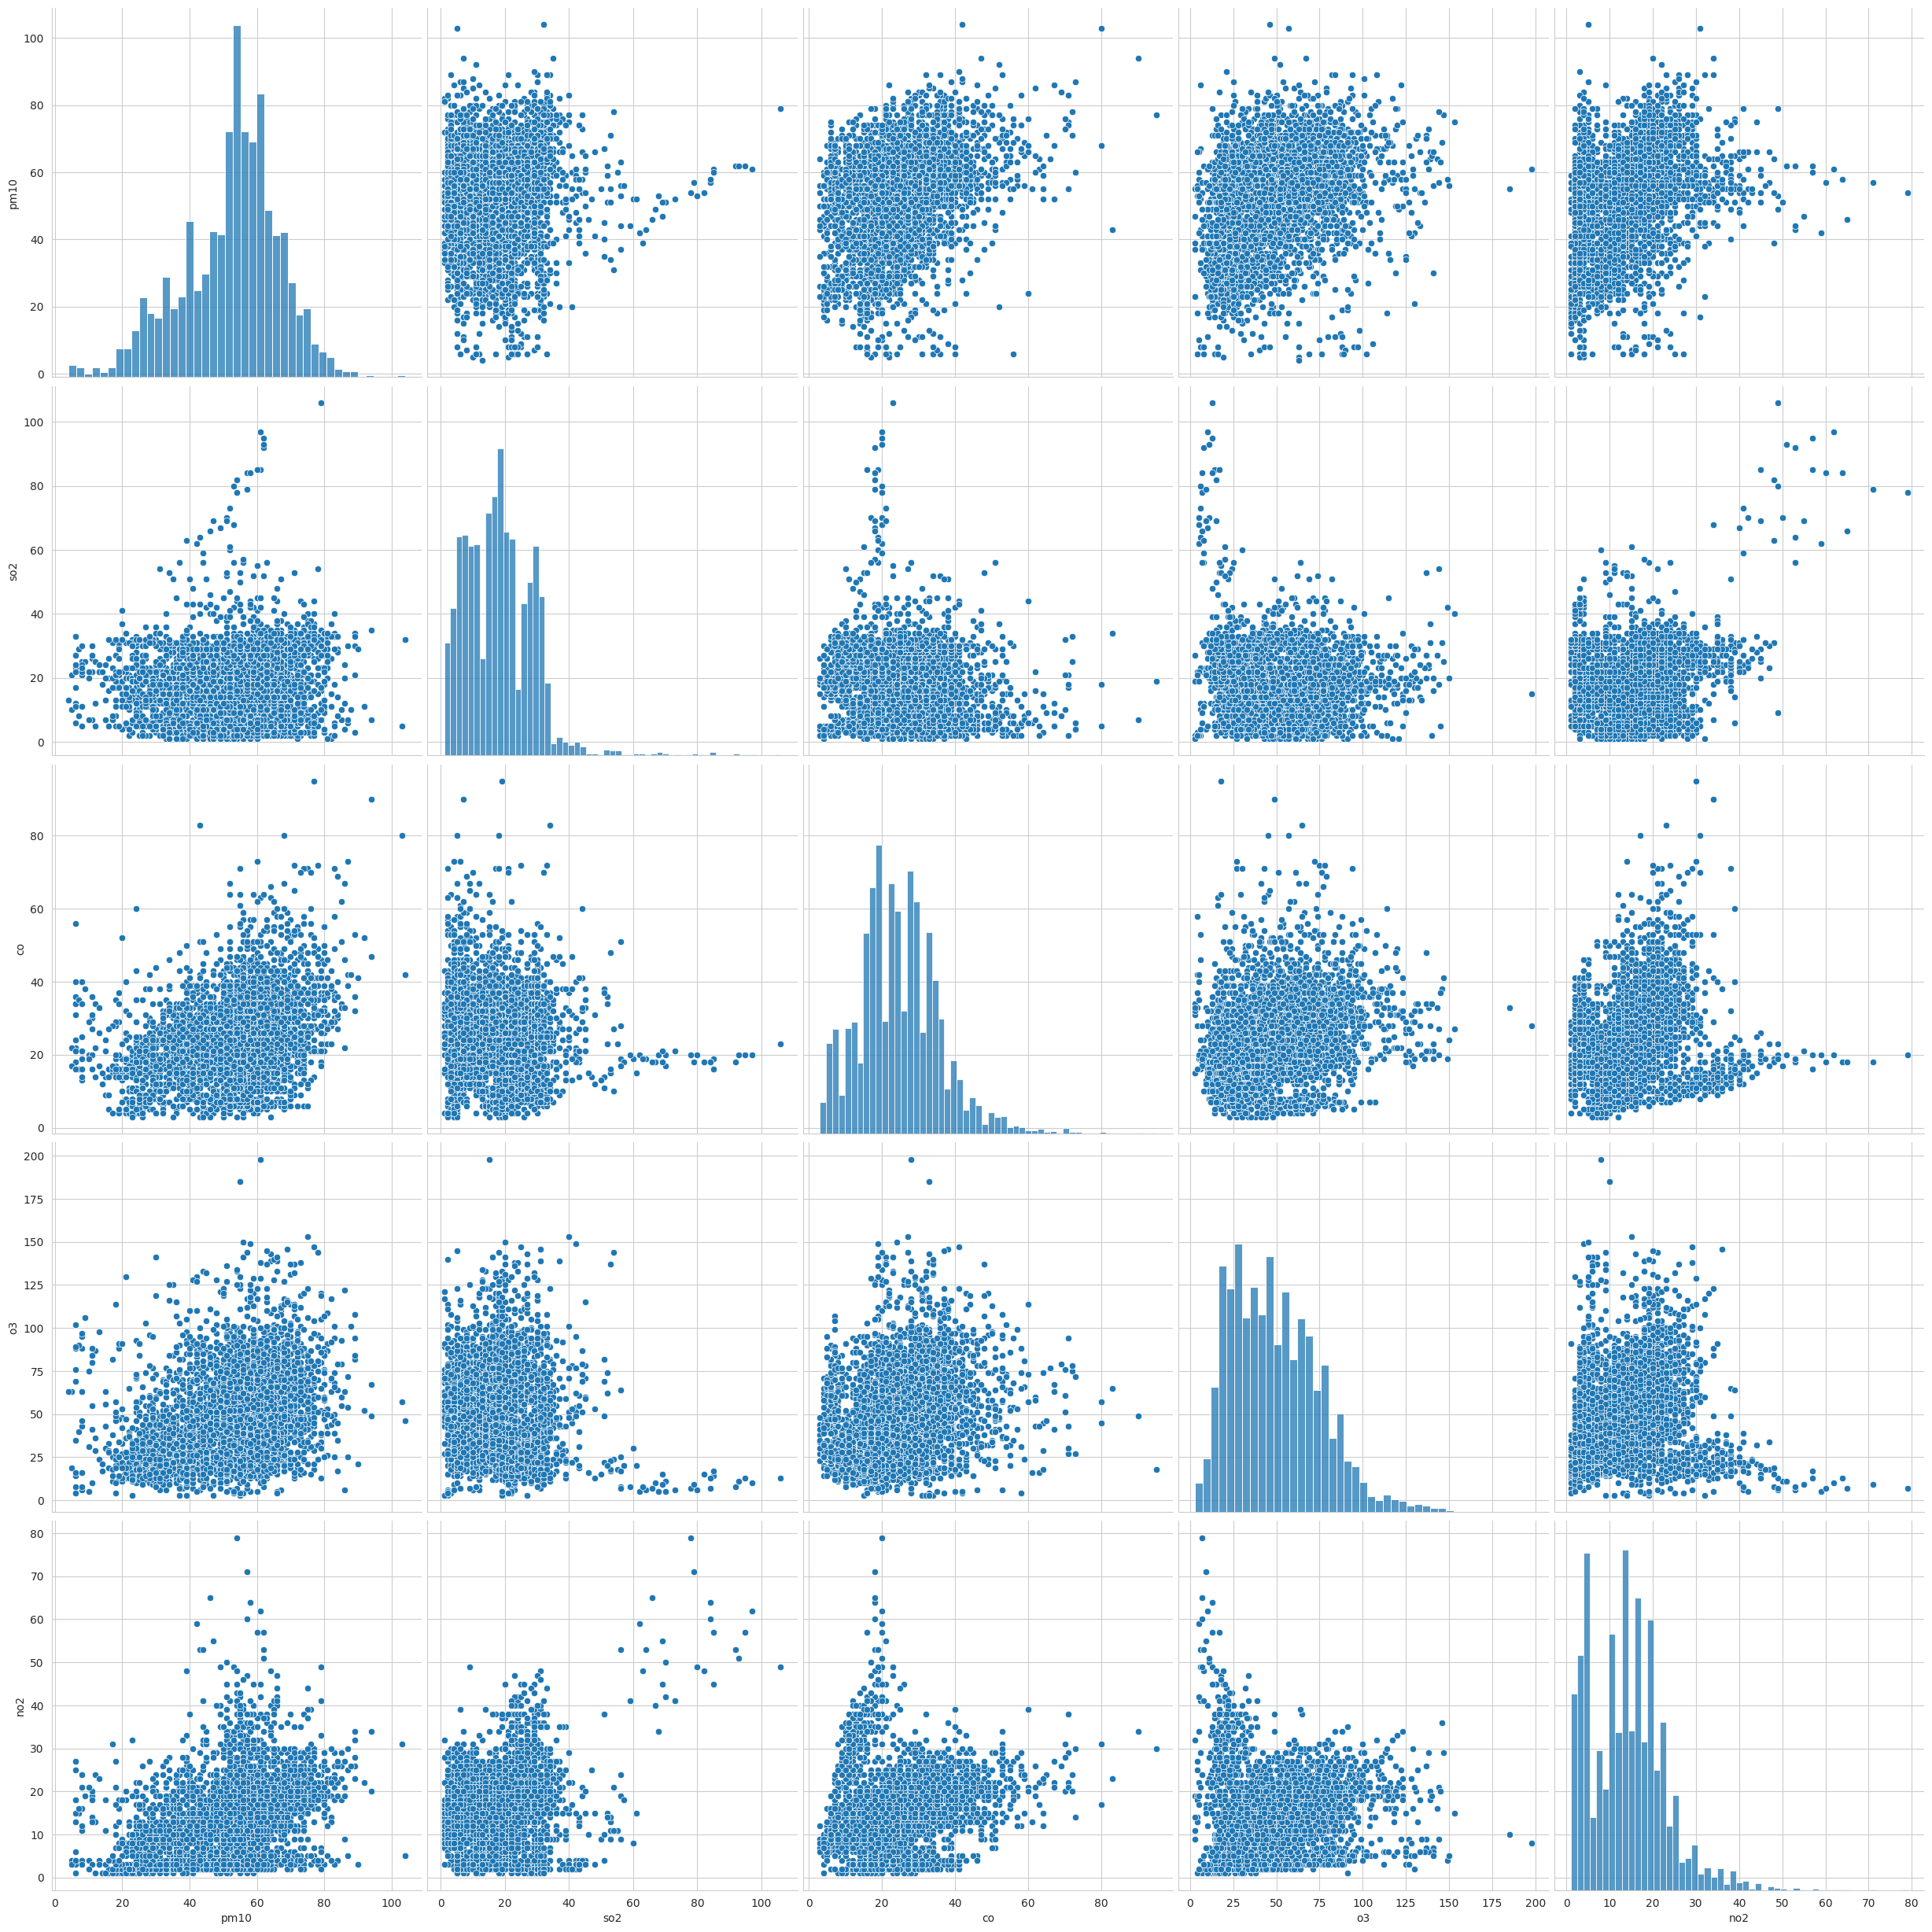

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(data, size=5)
plt.show()

Melihat hasil dari sebaran dataset tersebut dapat disimpulkan bahwa data nonlinier dan tidak baik jika menggunakan teknik imputasi Linier Interpolation

### Mengisi missing value dengan teknik Forward Fill (LOCF)

In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!#
missing_data_rows = data[data.iloc[:, 1:].isnull().any(axis=1)]
print(missing_data_rows)

        tanggal  pm10   so2    co    o3   no2 categori
82   2010-03-24   NaN   7.0  41.0  99.0  29.0   SEDANG
88   2010-03-30  44.0   6.0  33.0   NaN  12.0     BAIK
89   2010-03-31  58.0   5.0  57.0   NaN  14.0   SEDANG
90   2010-04-01  59.0   5.0  46.0   NaN  21.0   SEDANG
92   2010-04-03  37.0   4.0  18.0   NaN  10.0     BAIK
...         ...   ...   ...   ...   ...   ...      ...
3762 2020-04-20  60.0   3.0   NaN  73.0   7.0   SEDANG
3763 2020-04-21  46.0   4.0   NaN  35.0  10.0     BAIK
3773 2020-05-01  47.0   2.0   NaN  38.0  10.0     BAIK
3902 2020-09-07   NaN  23.0   6.0  64.0  12.0   SEDANG
4009 2020-12-23  43.0  26.0   NaN  26.0  13.0   SEDANG

[433 rows x 7 columns]


In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!#
data_ffill = data.copy()
data_ffill.replace('TIDAK ADA DATA', float('nan'), inplace=True)
data_ffill.fillna(method='ffill', inplace=True)
data_ffill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   4383 non-null   datetime64[ns]
 1   pm10      4383 non-null   float64       
 2   so2       4383 non-null   float64       
 3   co        4383 non-null   float64       
 4   o3        4383 non-null   float64       
 5   no2       4383 non-null   float64       
 6   categori  4383 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 239.8+ KB


<ipython-input-5-403a765abc3d>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_ffill.fillna(method='ffill', inplace=True)


### Evaluasi Kualitas Sebelum vs Sesudah Imputasi

1. Membandingkan statistik deskriptif

In [ ]:
data.describe()

tanggal         pm10          so2           co  \
count                 4383  4171.000000  4208.000000  4233.000000   
mean   2016-01-01 00:00:00    52.226325    18.091017    24.852351   
min    2010-01-01 00:00:00     4.000000     1.000000     3.000000   
25%    2012-12-31 12:00:00    43.000000    10.000000    17.000000   
50%    2016-01-01 00:00:00    54.000000    17.000000    24.000000   
75%    2018-12-31 12:00:00    62.000000    25.000000    31.000000   
max    2021-12-31 00:00:00   104.000000   106.000000    95.000000   
std                    NaN    14.578838    10.755446    11.153177   

                o3          no2  
count  4180.000000  4190.000000  
mean     49.514593    14.107637  
min       3.000000     1.000000  
25%      29.000000     7.000000  
50%      46.000000    14.000000  
75%      66.000000    19.000000  
max     198.000000    79.000000  
std      25.784704     8.948707

In [ ]:
data_ffill.describe()

tanggal         pm10          so2           co  \
count                 4383  4383.000000  4383.000000  4383.000000   
mean   2016-01-01 00:00:00    52.246863    17.962126    24.872690   
min    2010-01-01 00:00:00     4.000000     1.000000     3.000000   
25%    2012-12-31 12:00:00    43.000000    10.000000    18.000000   
50%    2016-01-01 00:00:00    54.000000    17.000000    24.000000   
75%    2018-12-31 12:00:00    62.000000    25.000000    31.000000   
max    2021-12-31 00:00:00   104.000000   106.000000    95.000000   
std                    NaN    14.706243    10.784725    11.177859   

                o3          no2  
count  4383.000000  4383.000000  
mean     49.289756    13.977641  
min       3.000000     1.000000  
25%      29.000000     6.000000  
50%      46.000000    14.000000  
75%      66.000000    19.000000  
max     198.000000    79.000000  
std      25.671769     8.908171

Jika statistik seperti mean atau distribusi nilai tetap mirip antara data sebelum dan setelah imputasi, maka kemungkinan imputasi tidak merusak struktur data.



2. Visualisasi Distribusi Sebelum dan Sesudah Imputasi, Apakah distribusi berbeda jauh?

In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!#
columns = ['pm10', 'so2', 'co', 'o3', 'no2']

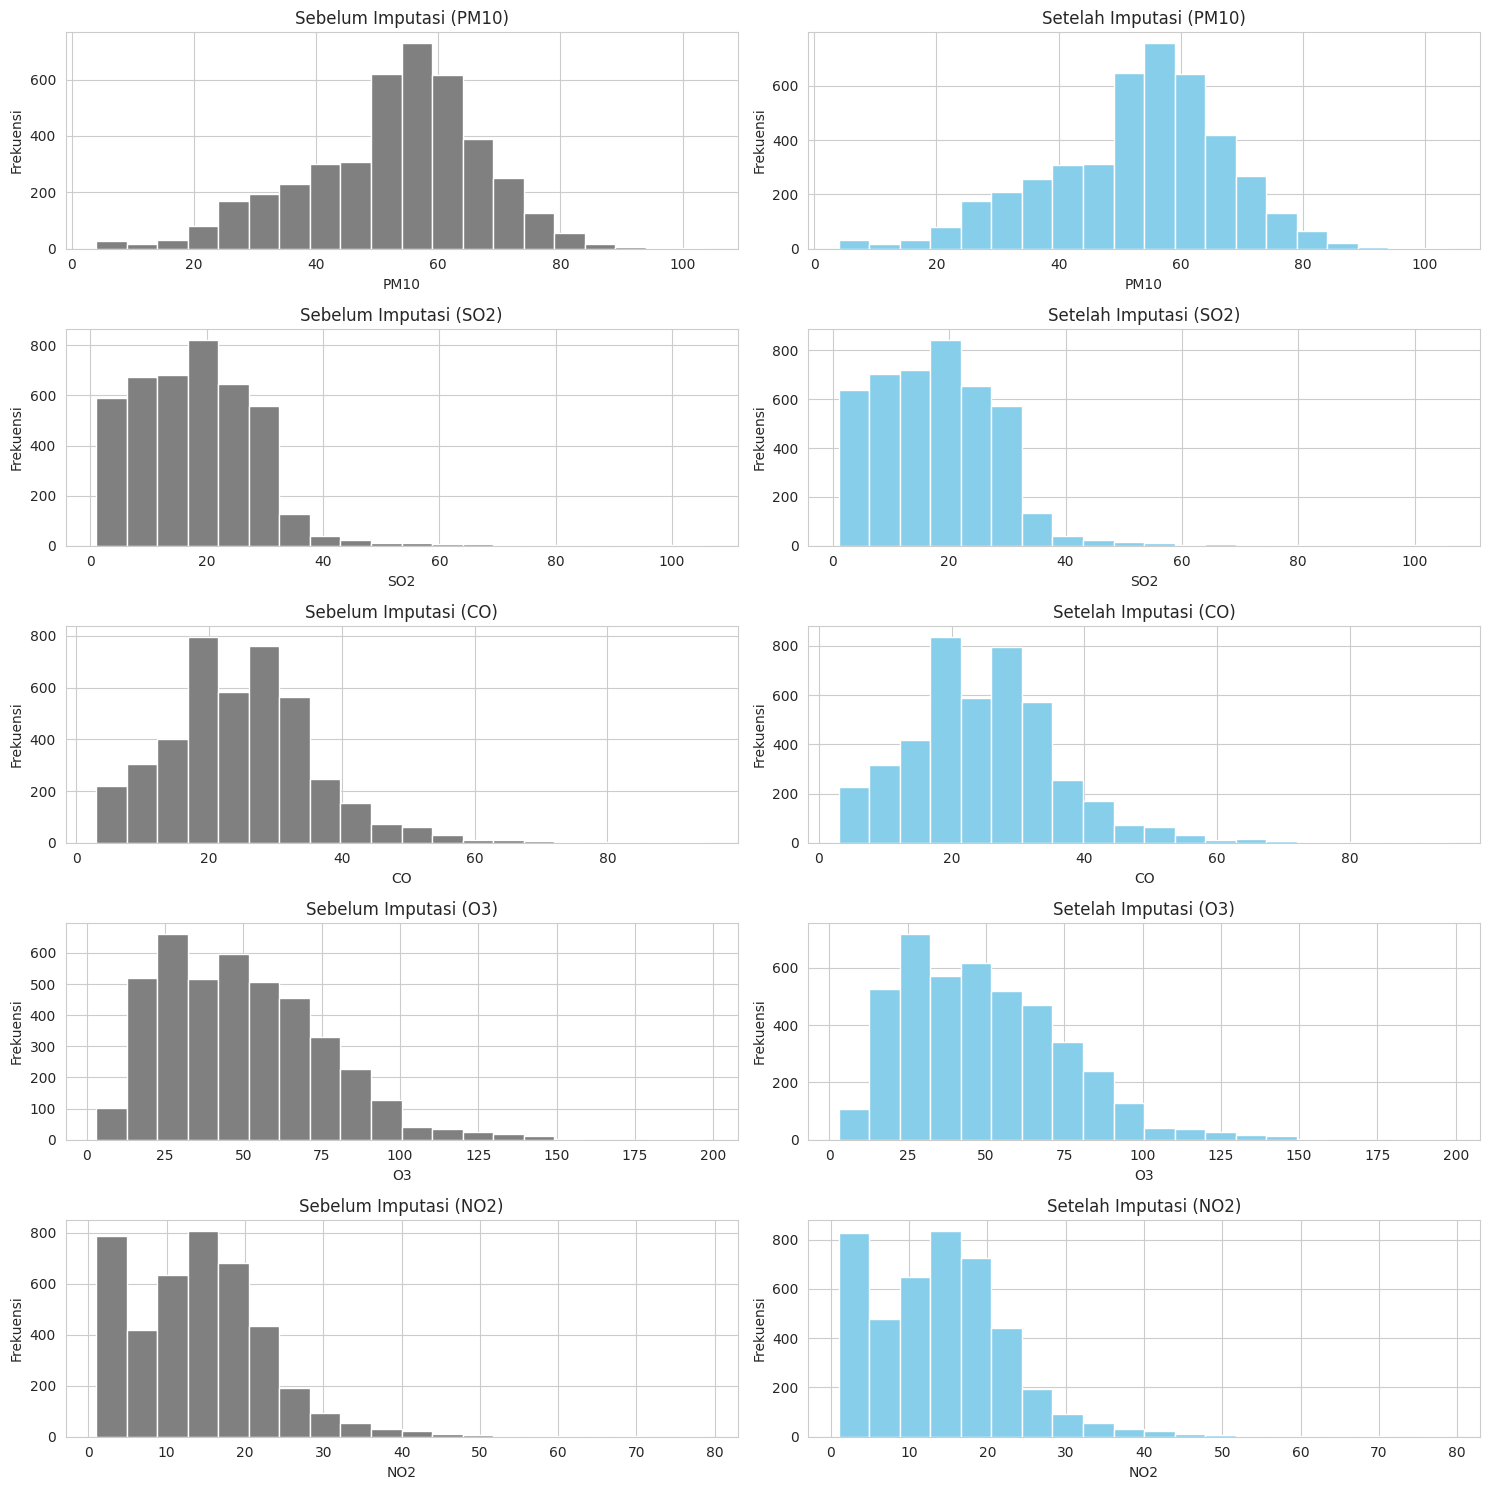

In [ ]:
plt.figure(figsize=(15, len(columns) * 3))

for i, col in enumerate(columns):
    plt.subplot(len(columns), 2, 2*i + 1)
    data[col].hist(bins=20, color='gray')
    plt.title(f'Sebelum Imputasi ({col.upper()})')
    plt.xlabel(col.upper())
    plt.ylabel('Frekuensi')

    plt.subplot(len(columns), 2, 2*i + 2)
    data_ffill[col].hist(bins=20, color='skyblue')
    plt.title(f'Setelah Imputasi ({col.upper()})')
    plt.xlabel(col.upper())
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

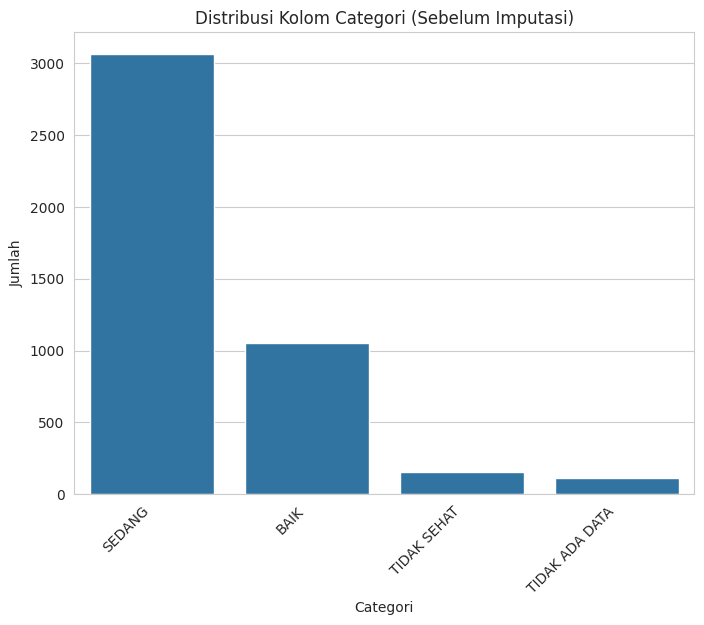

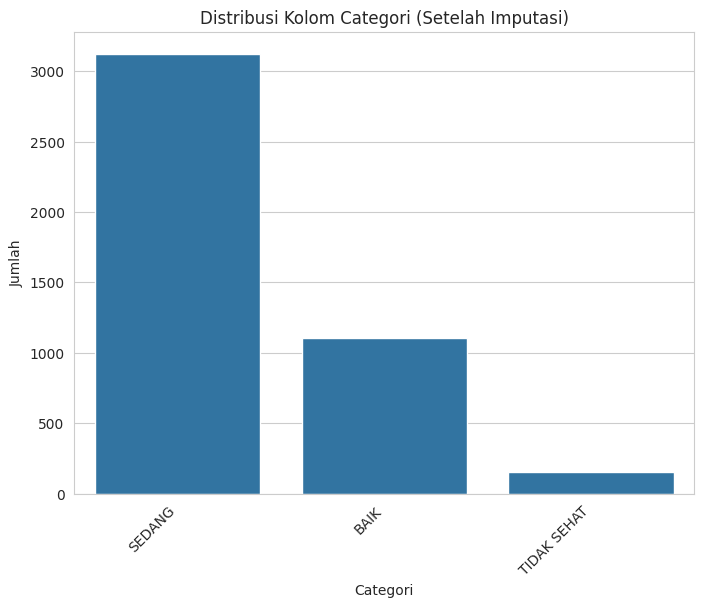

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='categori', data=data)
plt.title('Distribusi Kolom Categori (Sebelum Imputasi)')
plt.xlabel('Categori')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='categori', data=data_ffill)
plt.title('Distribusi Kolom Categori (Setelah Imputasi)')
plt.xlabel('Categori')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.show()

3. Cek Konsistensi Korelasi

In [ ]:
print("Korelasi sebelum imputasi:")
print(data.select_dtypes(include=np.number).corr())

print("\nKorelasi setelah imputasi:")
print(data_ffill.select_dtypes(include=np.number).corr())

Korelasi sebelum imputasi:
          pm10       so2        co        o3       no2
pm10  1.000000  0.077480  0.338934  0.313777  0.333890
so2   0.077480  1.000000 -0.112708 -0.155585  0.156804
co    0.338934 -0.112708  1.000000  0.264764  0.201870
o3    0.313777 -0.155585  0.264764  1.000000  0.131004
no2   0.333890  0.156804  0.201870  0.131004  1.000000

Korelasi setelah imputasi:
          pm10       so2        co        o3       no2
pm10  1.000000  0.065176  0.333657  0.297297  0.327115
so2   0.065176  1.000000 -0.114518 -0.151217  0.157865
co    0.333657 -0.114518  1.000000  0.263725  0.203111
o3    0.297297 -0.151217  0.263725  1.000000  0.137700
no2   0.327115  0.157865  0.203111  0.137700  1.000000


Kalau korelasi berubah secara signifikan, itu bisa jadi indikasi bahwa metode imputasi kamu mengubah struktur hubungan antar variabel.

### Melakukan encoding pada kolom categori

In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!#
value_counts = data_ffill['categori'].value_counts()
print("Jumlah kemunculan nilai unik pada kolom 'categori':\n", value_counts)
value_counts.sum()

Jumlah kemunculan nilai unik pada kolom 'categori':
 categori
SEDANG         3123
BAIK           1104
TIDAK SEHAT     156
Name: count, dtype: int64


np.int64(4383)

In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!#
data_ffill['label'] = data_ffill['categori'].map({'BAIK': 0, 'SEDANG': 1, 'TIDAK SEHAT': 2})
data_ffill.drop('categori', axis=1, inplace=True)
data_ffill['label'] = data_ffill['label'].astype(int)
data_ffill.head()

tanggal  pm10  so2    co    o3   no2  label
0 2010-01-01  60.0  4.0  73.0  27.0  14.0      1
1 2010-01-02  32.0  2.0  16.0  33.0   9.0      0
2 2010-01-03  27.0  2.0  19.0  20.0   9.0      0
3 2010-01-04  22.0  2.0  16.0  15.0   6.0      0
4 2010-01-05  25.0  2.0  17.0  15.0   8.0      0

In [ ]:
data_ffill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  4383 non-null   datetime64[ns]
 1   pm10     4383 non-null   float64       
 2   so2      4383 non-null   float64       
 3   co       4383 non-null   float64       
 4   o3       4383 non-null   float64       
 5   no2      4383 non-null   float64       
 6   label    4383 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 239.8 KB


### Melakukan pengecekan duplikasi data

In [ ]:
data_ffill.duplicated().sum()

np.int64(0)

### Melakukan pengecekan noise

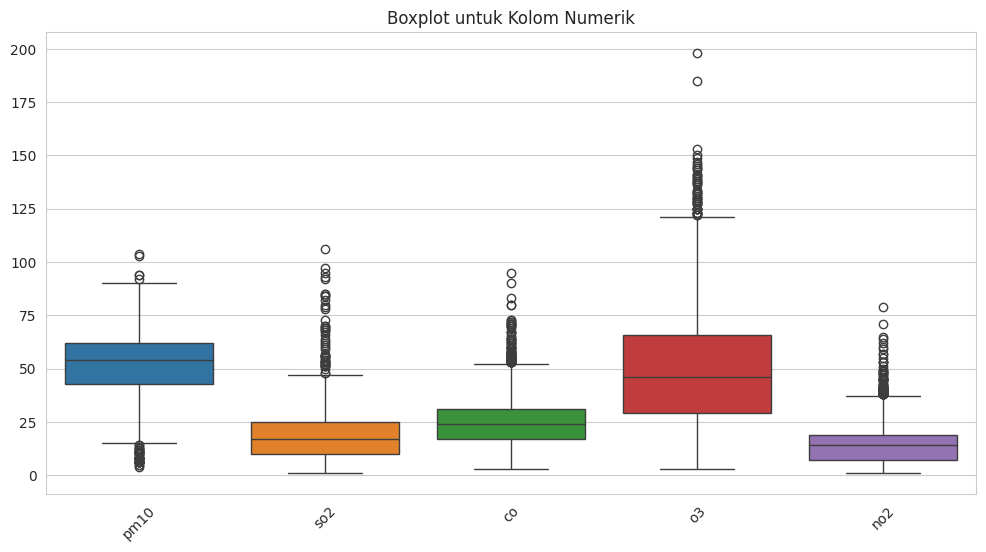

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[columns])
plt.xticks(rotation=45)
plt.title("Boxplot untuk Kolom Numerik")
plt.show()

In [ ]:
data_ffill.describe()

tanggal         pm10          so2           co  \
count                 4383  4383.000000  4383.000000  4383.000000   
mean   2016-01-01 00:00:00    52.246863    17.962126    24.872690   
min    2010-01-01 00:00:00     4.000000     1.000000     3.000000   
25%    2012-12-31 12:00:00    43.000000    10.000000    18.000000   
50%    2016-01-01 00:00:00    54.000000    17.000000    24.000000   
75%    2018-12-31 12:00:00    62.000000    25.000000    31.000000   
max    2021-12-31 00:00:00   104.000000   106.000000    95.000000   
std                    NaN    14.706243    10.784725    11.177859   

                o3          no2        label  
count  4383.000000  4383.000000  4383.000000  
mean     49.289756    13.977641     0.783710  
min       3.000000     1.000000     0.000000  
25%      29.000000     6.000000     0.000000  
50%      46.000000    14.000000     1.000000  
75%      66.000000    19.000000     1.000000  
max     198.000000    79.000000     2.000000  
std      25.671769     8.908171     0.490661

Melihat karakteristik dari deskripsi data yang ada setiap atribut polutan masing-masing seperti min, max, dan lainnya masih tergolong dalam rentang nilai yang dapat terjadi. Sehingga tidak diperlukan perubahan data outlier. mungkin si.....

### Melakukan normalisasi pada kolom numerik

In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!#
data_scaled = data_ffill.copy()
scaler = StandardScaler()
data_scaled[columns] = scaler.fit_transform(data_ffill[columns])
data_scaled.head(10)

tanggal      pm10       so2        co        o3       no2  label
0 2010-01-01  0.527261 -1.294768  4.306084 -0.868359  0.002510      1
1 2010-01-02 -1.376910 -1.480237 -0.793864 -0.634612 -0.558836      0
2 2010-01-03 -1.716940 -1.480237 -0.525446 -1.141063 -0.558836      0
3 2010-01-04 -2.056971 -1.480237 -0.793864 -1.335851 -0.895644      0
4 2010-01-05 -1.852953 -1.480237 -0.704391 -1.335851 -0.671106      0
5 2010-01-06 -1.512922 -1.387503 -0.257028 -1.180020 -0.334298      0
6 2010-01-07 -0.764855 -1.294768 -0.078082 -0.868359 -0.109759      0
7 2010-01-08  0.799285 -0.923831  2.337683 -1.180020  0.114780      1
8 2010-01-09  0.187230 -1.202034  1.264010 -1.024189  0.227049      1
9 2010-01-10 -1.240898 -1.202034 -0.167555 -0.907316 -0.222028      0

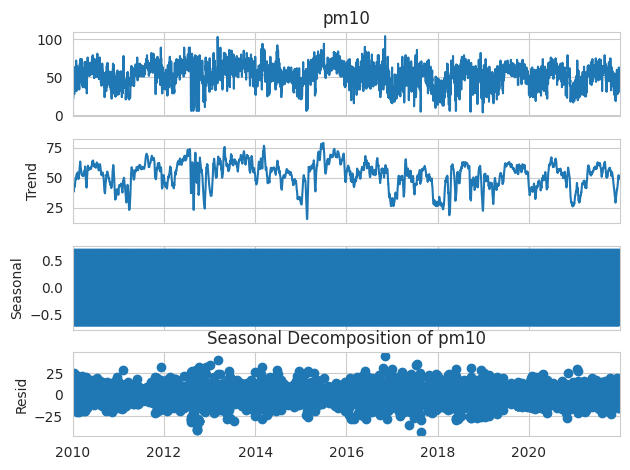

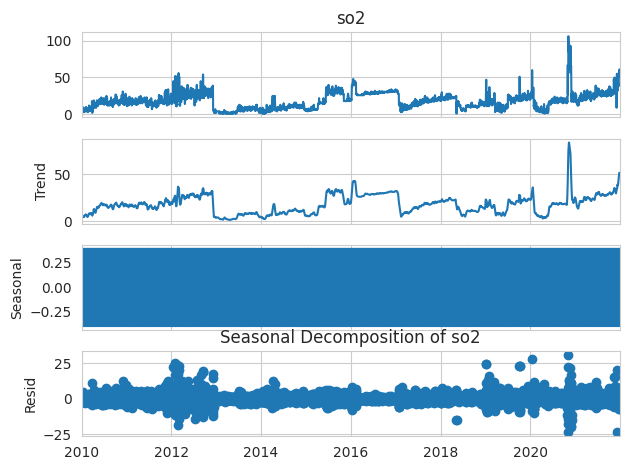

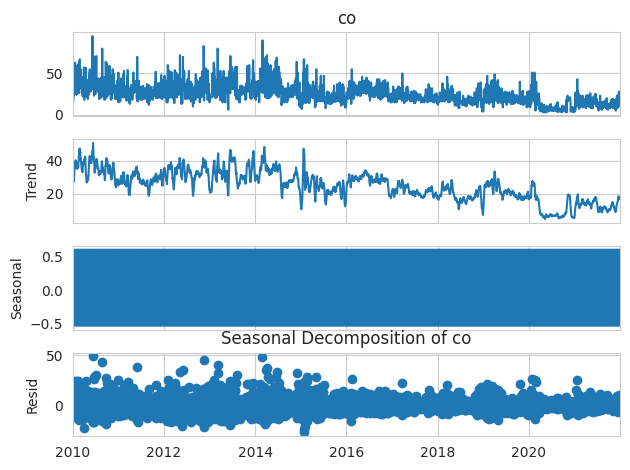

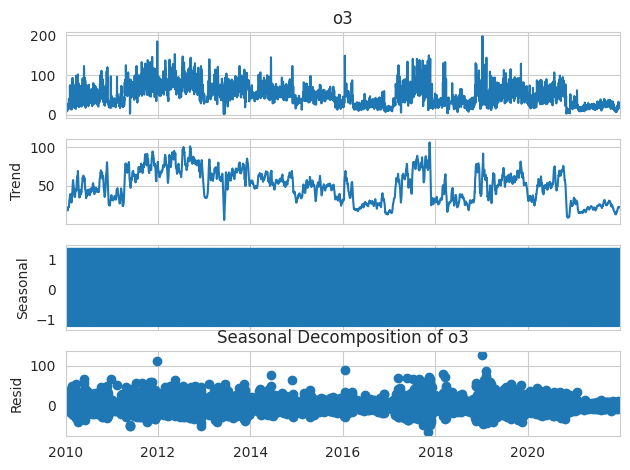

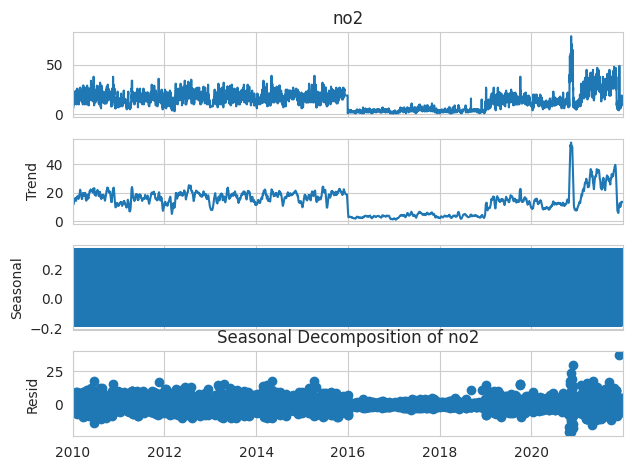

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

data_ffill = data_ffill.set_index('tanggal')

for col in columns:
    result = seasonal_decompose(data_ffill[col], model='additive', period=12)
    result.plot()
    plt.title(f'Seasonal Decomposition of {col}')
    plt.show()

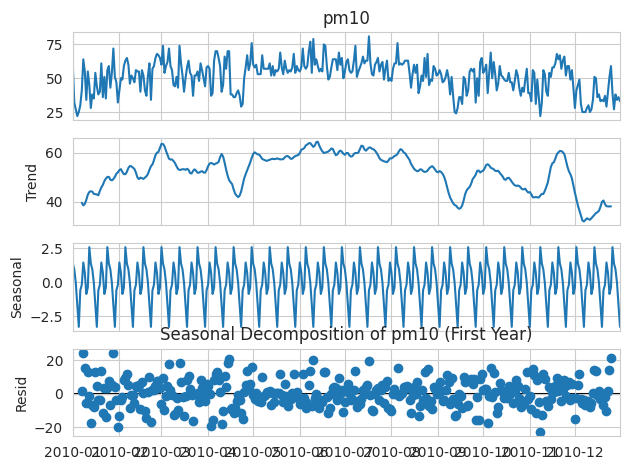

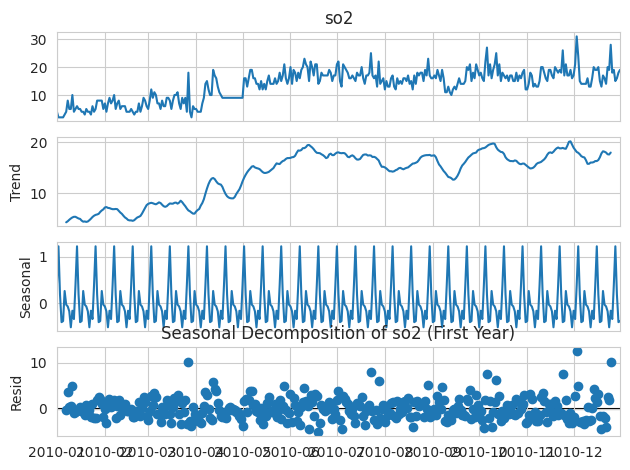

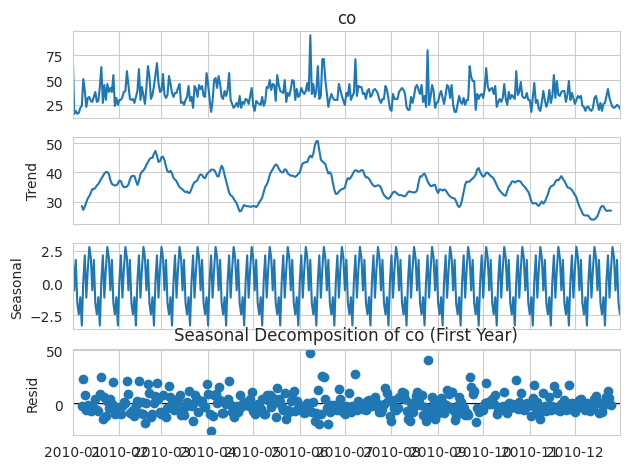

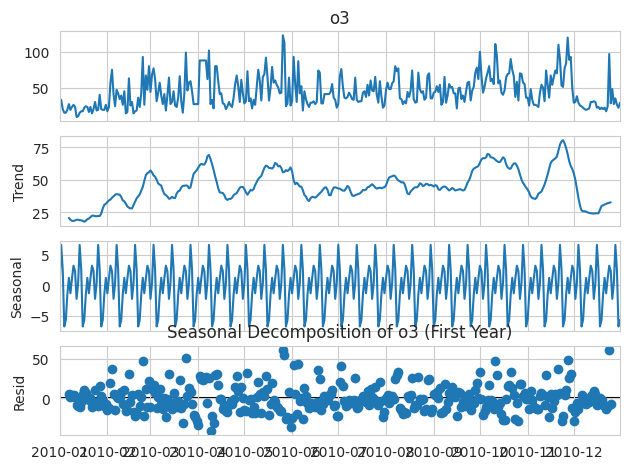

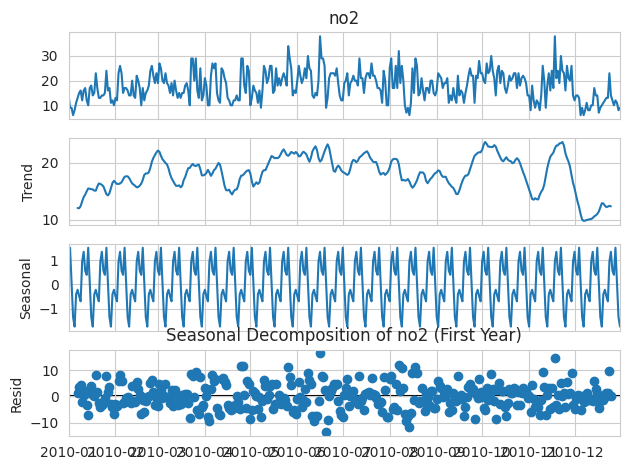

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

data_ffill_filtered = data_ffill[data_ffill.index.year == data_ffill.index.year.min()]

for col in columns:
    result = seasonal_decompose(data_ffill_filtered[col], model='additive', period=12)
    result.plot()
    plt.title(f'Seasonal Decomposition of {col} (First Year)')
    plt.show()

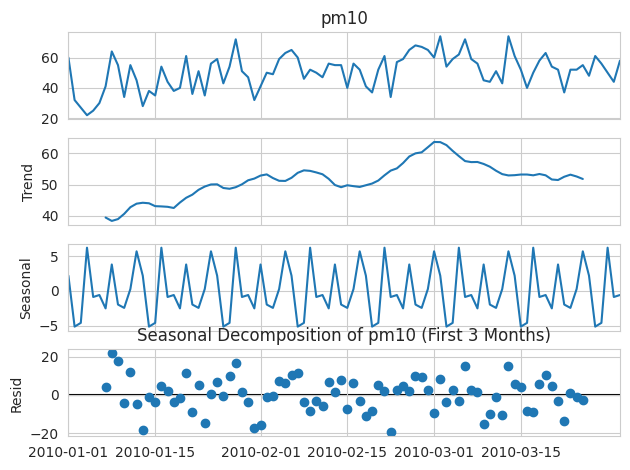

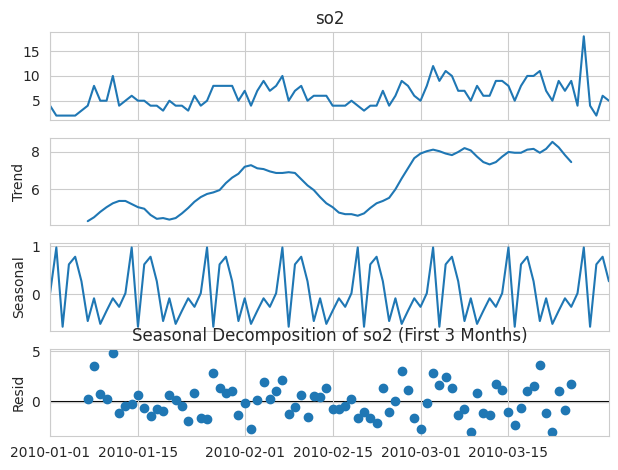

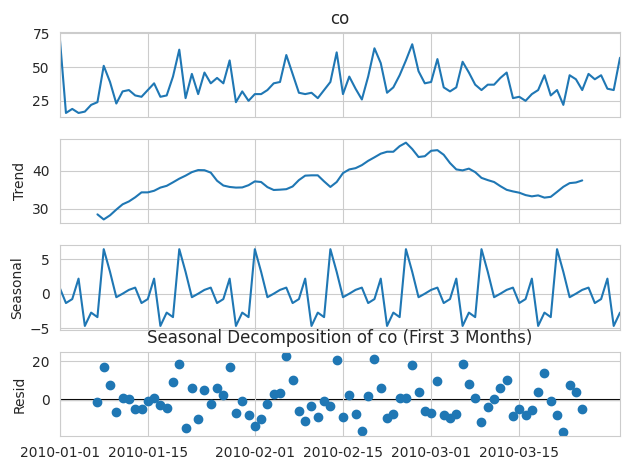

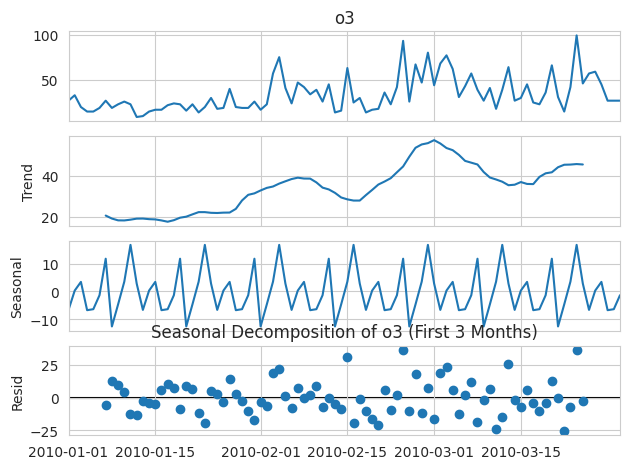

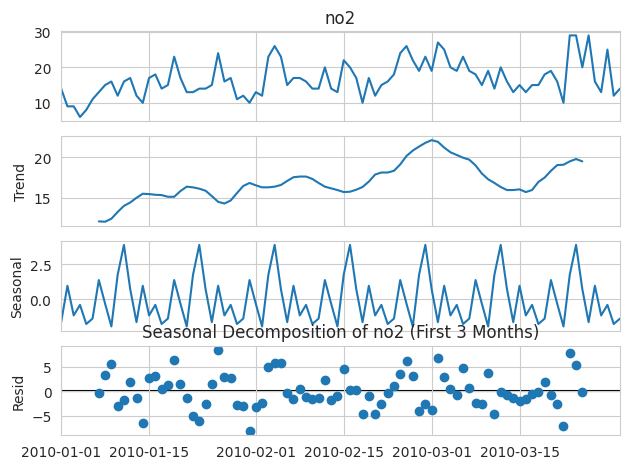

In [ ]:
data_ffill_filtered = data_ffill[(data_ffill.index.year == data_ffill.index.year.min()) & (data_ffill.index.month <= 3)]

for col in columns:
    result = seasonal_decompose(data_ffill_filtered[col], model='additive', period=12)
    result.plot()
    plt.title(f'Seasonal Decomposition of {col} (First 3 Months)')
    plt.show()

Index(['pm10', 'so2', 'co', 'o3', 'no2', 'label'], dtype='object')


<Figure size 800x400 with 0 Axes>

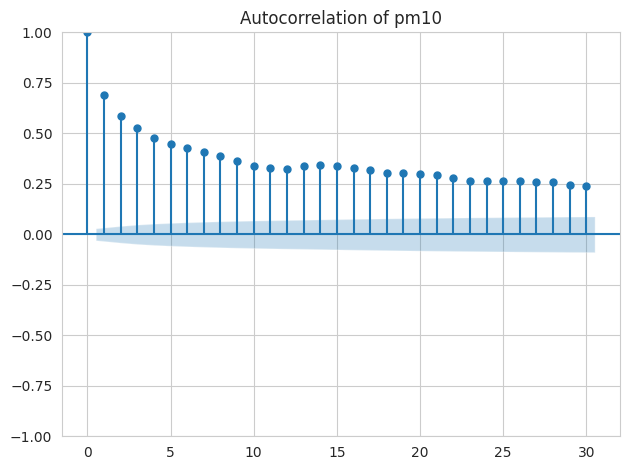

<Figure size 800x400 with 0 Axes>

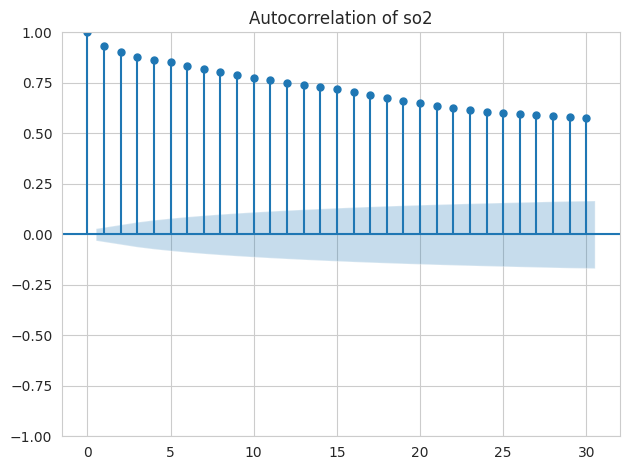

<Figure size 800x400 with 0 Axes>

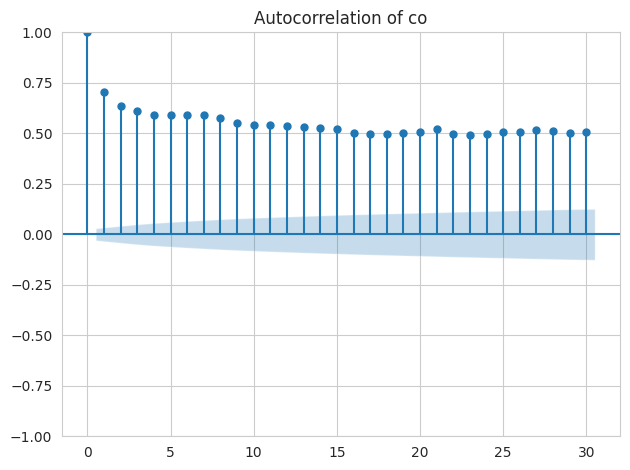

<Figure size 800x400 with 0 Axes>

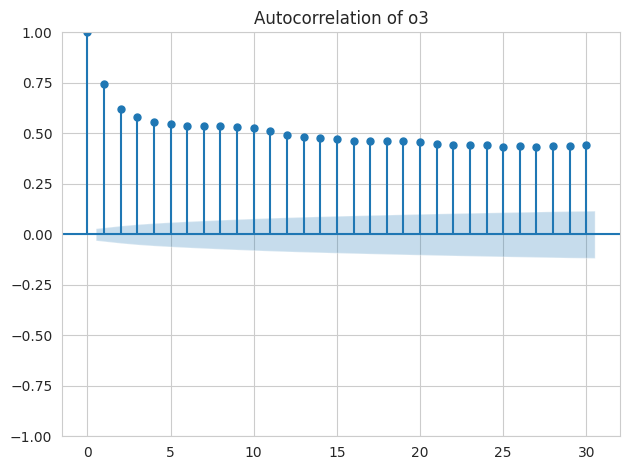

<Figure size 800x400 with 0 Axes>

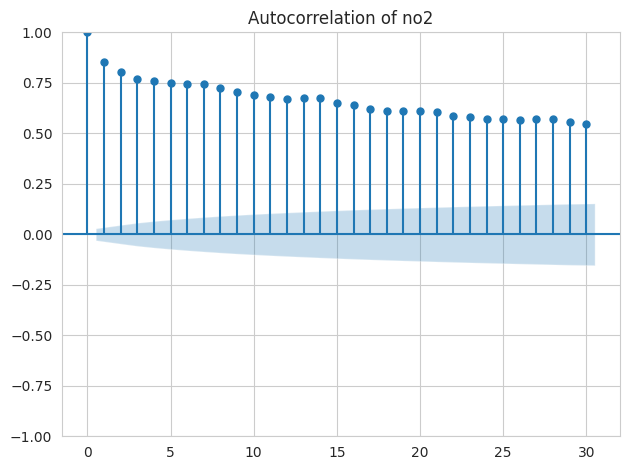

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import LabelEncoder


df = data_ffill
df = df.sort_values("tanggal").reset_index(drop=True)

print(df.columns)

for feat in columns:
    plt.figure(figsize=(8, 4))
    plot_acf(df[feat].dropna(), lags=30)
    plt.title(f"Autocorrelation of {feat}")
    plt.tight_layout()
    plt.show()

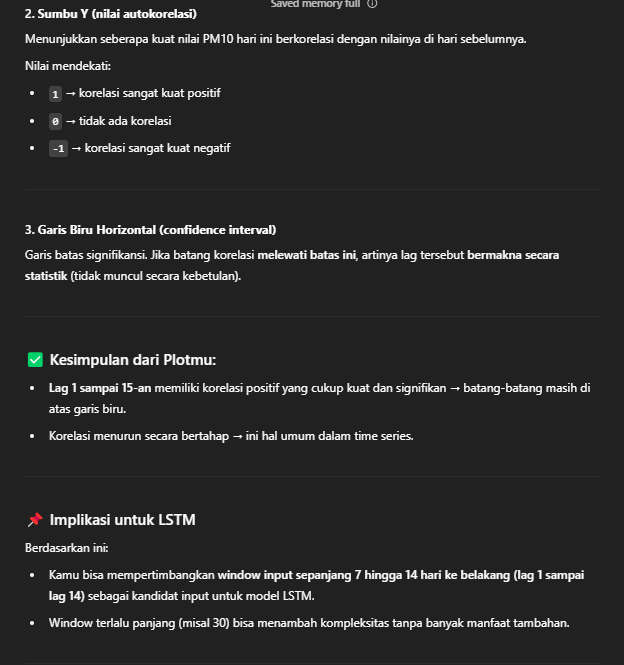


🔍 Korelasi antara fitur lag dengan label:
pm10_lag1    0.426144
o3_lag1      0.399251
pm10_lag2    0.364560
pm10_lag3    0.351011
pm10_lag4    0.345887
pm10_lag5    0.334632
o3_lag2      0.324772
pm10_lag6    0.322420
pm10_lag7    0.316942
no2_lag1     0.303413
o3_lag3      0.294244
o3_lag4      0.276476
o3_lag5      0.271117
no2_lag2     0.269685
no2_lag3     0.258393
o3_lag6      0.252871
o3_lag7      0.252299
no2_lag4     0.242913
no2_lag5     0.238234
no2_lag6     0.227811
no2_lag7     0.218512
co_lag1      0.138318
co_lag2      0.101152
so2_lag1     0.093728
co_lag4      0.093592
co_lag3      0.093164
co_lag5      0.091628
co_lag6      0.086499
co_lag7      0.083737
so2_lag2     0.080824
so2_lag3     0.072740
so2_lag4     0.067772
so2_lag5     0.065195
so2_lag6     0.063832
so2_lag7     0.052872
Name: label, dtype: float64


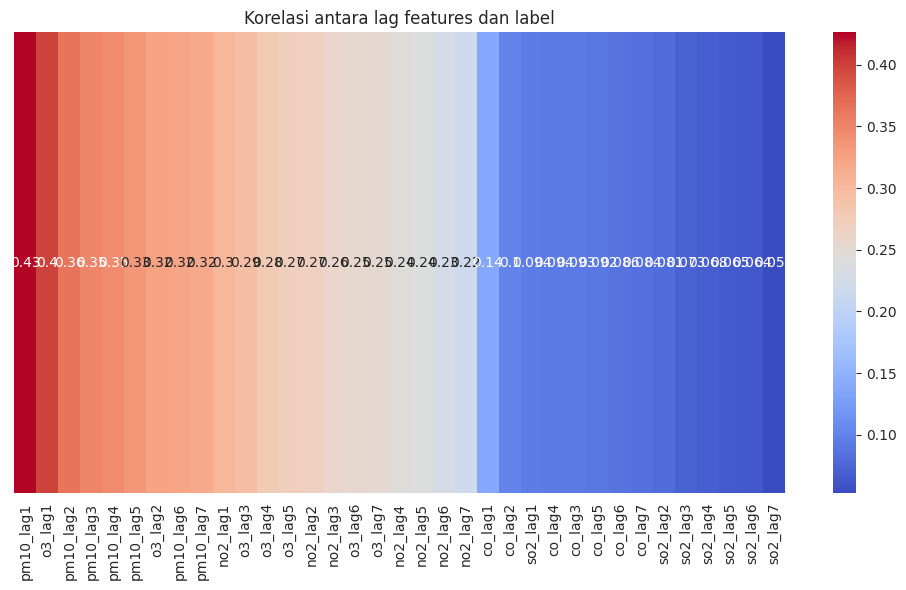

In [ ]:
max_lag = 7
for feat in columns:
    for lag in range(1, max_lag + 1):
        df[f"{feat}_lag{lag}"] = df[feat].shift(lag)

df_lagged = df.dropna().reset_index(drop=True)

correlation_matrix = df_lagged[[f"{feat}_lag{lag}" for feat in columns for lag in range(1, max_lag+1)] + ['label']].corr()

cor_with_label = correlation_matrix['label'].drop('label').sort_values(key=abs, ascending=False)

print("\n🔍 Korelasi antara fitur lag dengan label:")
print(cor_with_label)

plt.figure(figsize=(10, 6))
sns.heatmap(cor_with_label.to_frame().T, annot=True, cmap='coolwarm')
plt.title("Korelasi antara lag features dan label")
plt.yticks([])
plt.tight_layout()
plt.show()

# MODEL LSTM

### LSTM 7 day Klasifikasi Hari Besok

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

In [ ]:

df = data_scaled.drop(columns=['tanggal'])

# Buat sliding window 7 hari untuk prediksi hari ke-8
def create_sequences(data, time_steps=7):
    X, y = [], []
    for i in range(len(data) - time_steps):
        seq_x = data.iloc[i:i+time_steps].drop(columns=['label']).values
        seq_y = data.iloc[i+time_steps]['label']
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

X, y = create_sequences(df, time_steps=7)

Split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model 1

In [ ]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(64, return_sequences=False),
    Dropout(0.1),
    Dense(3, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-7), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

lr_schedule = LearningRateScheduler(lambda epoch: 1e-7 * 10**(epoch / 20))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 128)         │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,195 (469.51 KB)

 Trainable params: 120,195 (469.51 KB)

 Non-trainable params: 0 (0.00 B)

Latih model 1

In [ ]:

history_lr= model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=8,
                    validation_split=0.2,
                    callbacks=[lr_schedule],
                    verbose=1)


Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5180 - loss: 1.0684 - val_accuracy: 0.5157 - val_loss: 1.0697 - learning_rate: 1.0000e-07
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5101 - loss: 1.0671 - val_accuracy: 0.5300 - val_loss: 1.0688 - learning_rate: 1.1220e-07
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5223 - loss: 1.0675 - val_accuracy: 0.5357 - val_loss: 1.0679 - learning_rate: 1.2589e-07
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5442 - loss: 1.0645 - val_accuracy: 0.5400 - val_loss: 1.0668 - learning_rate: 1.4125e-07
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5419 - loss: 1.0643 - val_accuracy: 0.5471 - val_loss: 1.0655 - learning_rate: 1.5849e-07
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5508 - loss: 1.0624 - val_accuracy: 0.5586 - val_loss: 1.0642 - learning_rate: 1.7783e-07
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/ste

evaluasi model 1

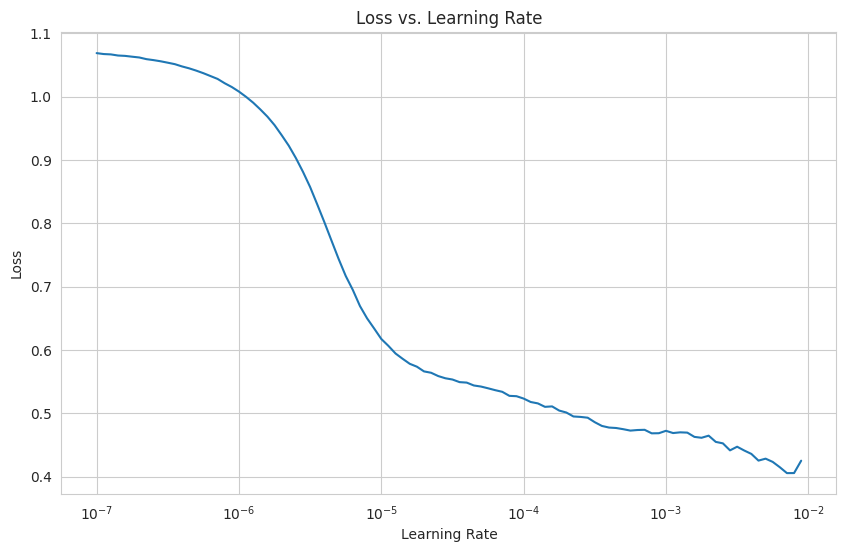

In [ ]:
lrs = 1e-7 * (10 ** (np.arange(100) / 20))
plt.figure(figsize=(10, 6))
plt.semilogx(lrs, history_lr.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Loss vs. Learning Rate")
plt.grid(True)
plt.show()

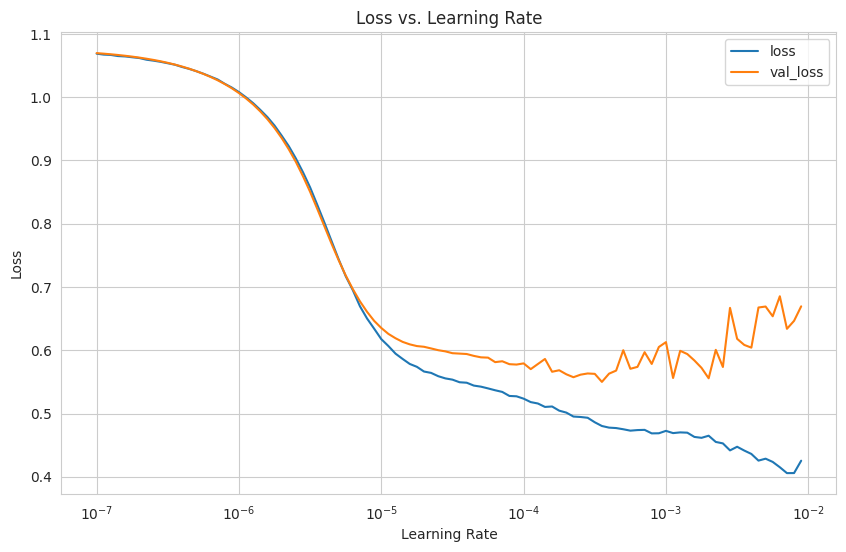

In [ ]:
lrs = 1e-7 * (10 ** (np.arange(100) / 20))
plt.figure(figsize=(10, 6))
plt.semilogx(lrs, history_lr.history["loss"])
plt.semilogx(lrs, history_lr.history["val_loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Loss vs. Learning Rate")
plt.grid(True)
plt.legend(['loss', 'val_loss'])
plt.show()

Model 2

In [ ]:
#!!!
model_1 = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model_1.compile(optimizer=Adam(learning_rate=1e-7), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

lr_schedule = LearningRateScheduler(lambda epoch: 1e-7 * 10**(epoch / 20))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 7, 128)         │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,195 (469.51 KB)

 Trainable params: 120,195 (469.51 KB)

 Non-trainable params: 0 (0.00 B)

Latih model 2

In [ ]:
history_lr3= model_1.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[lr_schedule],
                    verbose=1)



Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.5293 - loss: 1.0858 - val_accuracy: 0.5586 - val_loss: 1.0839 - learning_rate: 1.0000e-07
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5317 - loss: 1.0852 - val_accuracy: 0.5614 - val_loss: 1.0836 - learning_rate: 1.1220e-07
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5286 - loss: 1.0842 - val_accuracy: 0.5614 - val_loss: 1.0834 - learning_rate: 1.2589e-07
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5330 - loss: 1.0841 - val_accuracy: 0.5643 - val_loss: 1.0831 - learning_rate: 1.4125e-07
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5331 - loss: 1.0838 - val_accuracy: 0.5686 - val_loss: 1.0828 - learning_rate: 1.5849e-07
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5407 - loss: 1.0832 - val_accuracy: 0.5714 - val_loss: 1.0824 - learning_rate: 1.7783e-07
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 

hasil evaluasi model 2

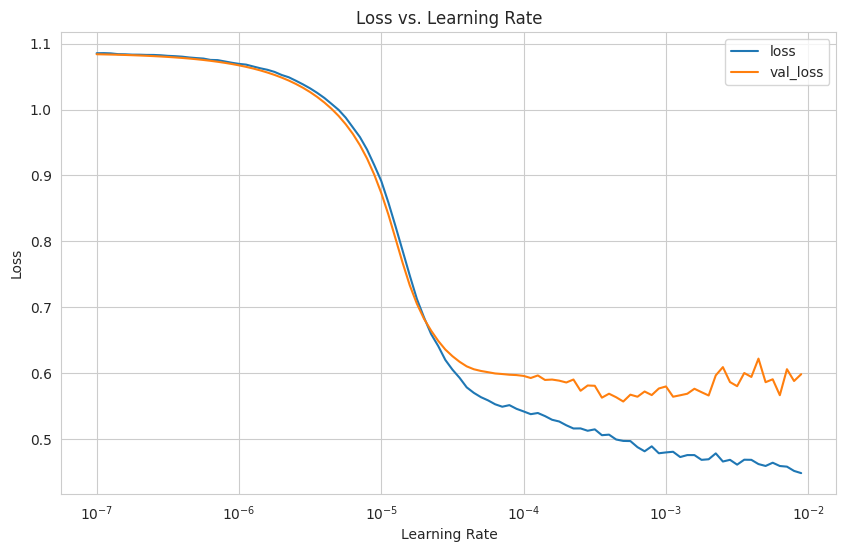

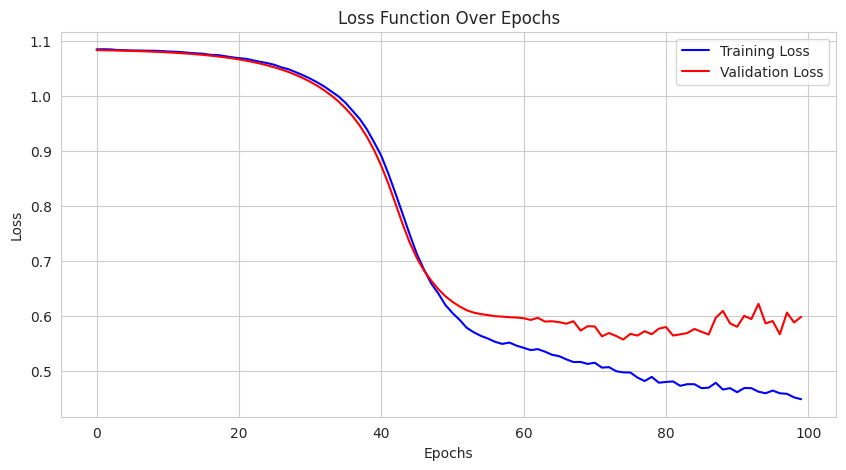

In [ ]:
lrs = 1e-7 * (10 ** (np.arange(len(history_lr3.history["loss"])) / 20))
plt.figure(figsize=(10, 6))
plt.semilogx(lrs, history_lr3.history["loss"])
plt.semilogx(lrs, history_lr3.history["val_loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Loss vs. Learning Rate")
plt.grid(True)
plt.legend(['loss', 'val_loss'])
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(history_lr3.history['loss'], label='Training Loss', color='blue')
plt.plot(history_lr3.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss Function Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model 3

In [ ]:
#!!!
model_3 = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model_3.compile(optimizer=Adam(learning_rate=1e-7), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_3.summary()

lr_schedule = LearningRateScheduler(lambda epoch: 1e-7 * 10**(epoch / 20))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 7, 128)         │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,195 (469.51 KB)

 Trainable params: 120,195 (469.51 KB)

 Non-trainable params: 0 (0.00 B)

Latih model 3

In [ ]:
history_lr3= model_3.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[lr_schedule],
                    verbose=1)

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.2937 - loss: 1.1022 - val_accuracy: 0.2971 - val_loss: 1.0984 - learning_rate: 1.0000e-07
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3157 - loss: 1.0998 - val_accuracy: 0.3029 - val_loss: 1.0982 - learning_rate: 1.1220e-07
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.2916 - loss: 1.1010 - val_accuracy: 0.3057 - val_loss: 1.0979 - learning_rate: 1.2589e-07
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3019 - loss: 1.1009 - val_accuracy: 0.3114 - val_loss: 1.0977 - learning_rate: 1.4125e-07
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.3021 - loss: 1.0998 - val_accuracy: 0.3157 - val_loss: 1.0974 - learning_rate: 1.5849e-07
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.3090 - loss: 1.1003 - val_accuracy: 0.3243 - val_loss: 1.0971 - learning_rate: 1.7783e-07
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 

Ketiga model diatas hanya untuk melihat evaluasi epoch dan learning rate

### Model fix input 7 day klasifikasi prediksi day 8

Model Fix 1

In [ ]:
model_fix = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

model_fix.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_fix.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    min_delta=1e-4,
    restore_best_weights=True
)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                  │ (None, 7, 128)         │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 7, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,011 (511.76 KB)

 Trainable params: 131,011 (511.76 KB)

 Non-trainable params: 0 (0.00 B)

Latih model fix 1

In [ ]:
history_fix= model_fix.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.6560 - loss: 0.8744 - val_accuracy: 0.7657 - val_loss: 0.6150
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7651 - loss: 0.5801 - val_accuracy: 0.7800 - val_loss: 0.6190
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7837 - loss: 0.5460 - val_accuracy: 0.7914 - val_loss: 0.5809
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7881 - loss: 0.5406 - val_accuracy: 0.7886 - val_loss: 0.5701
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7939 - loss: 0.5153 - val_accuracy: 0.7971 - val_loss: 0.5558
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7960 - loss: 0.5214 - val_accuracy: 0.7971 - val_loss: 0.5678
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8075 - loss: 0.4943 - val_accuracy: 0.7886 - val_loss: 0.5613
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8136 - loss: 0.4810 - val_accuracy: 0

Evaluasi model fix 1

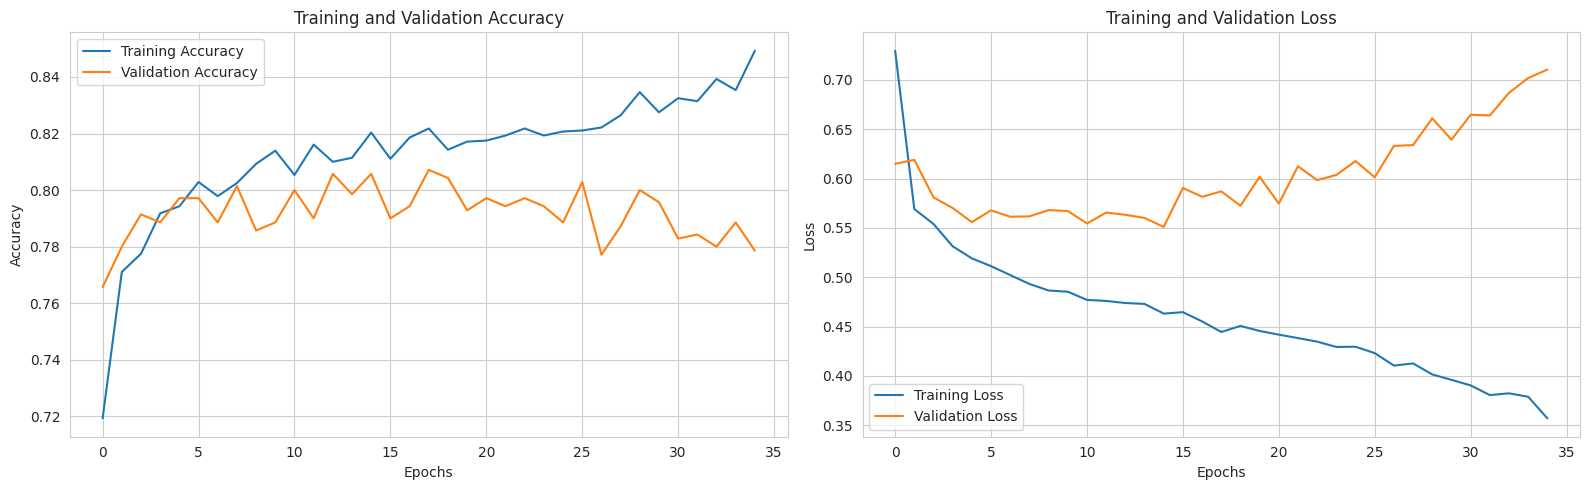

In [ ]:
# Create a single figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Plot accuracy on the first subplot (ax1)
ax1.plot(history_fix.history['accuracy'], label='Training Accuracy')
ax1.plot(history_fix.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.set_title('Training and Validation Accuracy')

ax2.plot(history_fix.history['loss'], label='Training Loss')
ax2.plot(history_fix.history['val_loss'], label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.set_title('Training and Validation Loss')

plt.tight_layout()

plt.show()

### Evaluasi

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
from sklearn.metrics import RocCurveDisplay

Model fix 2

In [ ]:
#!!!!
model_fix10 = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False, kernel_regularizer=l2(1e-4)),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model_fix10.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_fix10.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    min_delta=1e-5,
    restore_best_weights=True
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_40 (LSTM)                  │ (None, 7, 128)         │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_41 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,195 (469.51 KB)

 Trainable params: 120,195 (469.51 KB)

 Non-trainable params: 0 (0.00 B)

Latih model fix 2

In [ ]:
history_fix7 = model_fix10.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.6185 - loss: 0.8957 - val_accuracy: 0.7729 - val_loss: 0.6227
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7960 - loss: 0.5486 - val_accuracy: 0.7857 - val_loss: 0.5975
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7907 - loss: 0.5444 - val_accuracy: 0.7943 - val_loss: 0.5940
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7786 - loss: 0.5646 - val_accuracy: 0.7986 - val_loss: 0.5838
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7963 - loss: 0.5125 - val_accuracy: 0.8071 - val_loss: 0.5654
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8127 - loss: 0.4984 - val_accuracy: 0.7957 - val_loss: 0.5689
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.8130 - loss: 0.4880 - val_accuracy: 0.7914 - val_loss: 0.5727
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8019 - loss: 0.4975 - val_accuracy: 0.

evaluasi model fix 2

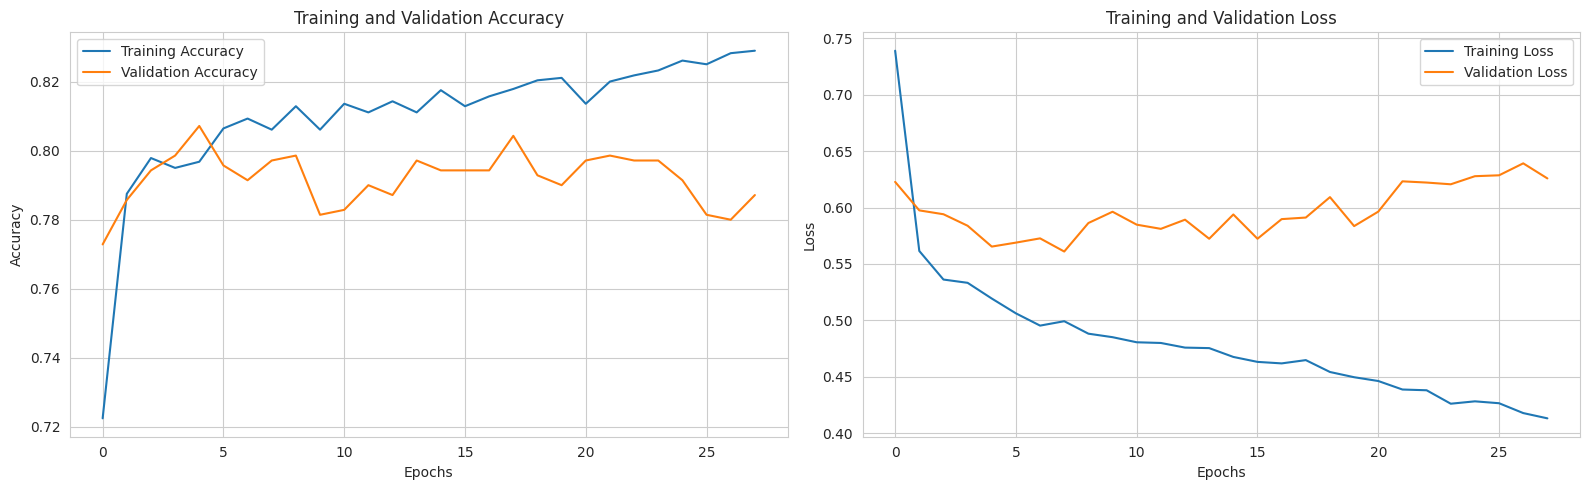

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.plot(history_fix7.history['accuracy'], label='Training Accuracy')
ax1.plot(history_fix7.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.set_title('Training and Validation Accuracy')

ax2.plot(history_fix7.history['loss'], label='Training Loss')
ax2.plot(history_fix7.history['val_loss'], label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.set_title('Training and Validation Loss')

plt.tight_layout()

plt.show()

Uji model fix 2 dengan data test

In [ ]:
y_pred = model_fix10.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Sensitivity / Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1-Score: {f1}')

test_loss, test_acc = model_fix10.evaluate(X_test, y_test, verbose=2)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Accuracy: 0.8299086757990868
Sensitivity / Recall: 0.8299086757990868
Precision: 0.802716894977169
F1-Score: 0.8077605410908505


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


28/28 - 0s - 7ms/step - accuracy: 0.8299 - loss: 0.4545


Model fix 3 (Model yang digunakan)

In [ ]:
model_fix11 = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(64, return_sequences=False, kernel_regularizer=l2(1e-4)),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model_fix11.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_fix11.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    min_delta=1e-5,
    restore_best_weights=True
)

history_fix8 = model_fix11.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_42 (LSTM)                  │ (None, 7, 128)         │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_43 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,211 (461.76 KB)

 Trainable params: 118,211 (461.76 KB)

 Non-trainable params: 0 (0.00 B)

Latih model fix 3

In [ ]:
history_fix8 = model_fix11.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6787 - loss: 0.7962 - val_accuracy: 0.7771 - val_loss: 0.6087
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7818 - loss: 0.5719 - val_accuracy: 0.7886 - val_loss: 0.5882
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7939 - loss: 0.5319 - val_accuracy: 0.7914 - val_loss: 0.5800
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7943 - loss: 0.5290 - val_accuracy: 0.7986 - val_loss: 0.5662
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8132 - loss: 0.4833 - val_accuracy: 0.7871 - val_loss: 0.5724
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8042 - loss: 0.5111 - val_accuracy: 0.8029 - val_loss: 0.5648
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8171 - loss: 0.5068 - val_accuracy: 0.7929 - val_loss: 0.5687
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8154 - loss: 0.4826 - val_accuracy: 0.

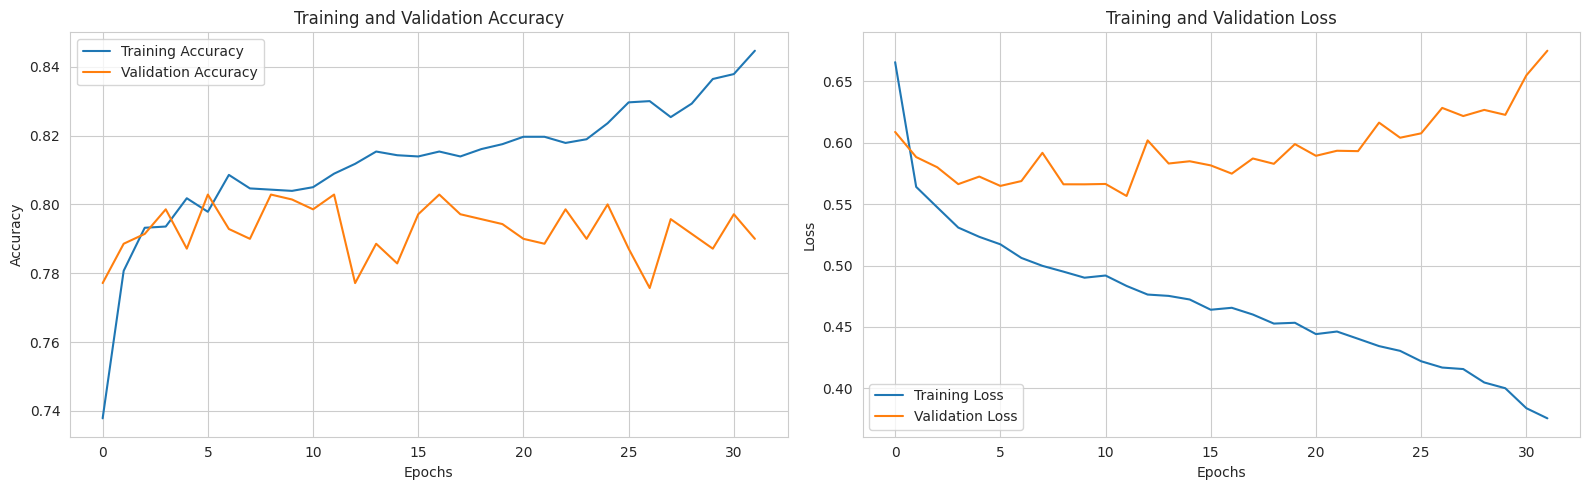

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.plot(history_fix8.history['accuracy'], label='Training Accuracy')
ax1.plot(history_fix8.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.set_title('Training and Validation Accuracy')

ax2.plot(history_fix8.history['loss'], label='Training Loss')
ax2.plot(history_fix8.history['val_loss'], label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.set_title('Training and Validation Loss')

plt.tight_layout()

plt.show()

Uji model fix 3 dengan data test

In [ ]:
y_pred = model_fix11.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Sensitivity / Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1-Score: {f1}')

test_loss, test_acc = model_fix11.evaluate(X_test, y_test, verbose=2)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Accuracy: 0.8344748858447488
Sensitivity / Recall: 0.8344748858447488
Precision: 0.8061103436808514
F1-Score: 0.8144190830678306


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


28/28 - 0s - 7ms/step - accuracy: 0.8345 - loss: 0.4531


Download model terbagus

In [ ]:
model_fix11.save('model_lstm_fix.h5')

Model fix 4

In [ ]:
model_fix12 = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
model_fix12.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_fix12.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    min_delta=1e-4,
    restore_best_weights=True
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_44 (LSTM)                  │ (None, 7, 128)         │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_45 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,195 (469.51 KB)

 Trainable params: 120,195 (469.51 KB)

 Non-trainable params: 0 (0.00 B)

Latih model fix 4

In [ ]:
history_fix9 = model_fix12.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.6525 - loss: 0.8692 - val_accuracy: 0.7843 - val_loss: 0.6031
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7643 - loss: 0.5920 - val_accuracy: 0.7857 - val_loss: 0.5774
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7896 - loss: 0.5478 - val_accuracy: 0.7814 - val_loss: 0.5668
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7905 - loss: 0.5544 - val_accuracy: 0.8014 - val_loss: 0.5735
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7985 - loss: 0.5307 - val_accuracy: 0.7943 - val_loss: 0.5634
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8115 - loss: 0.5006 - val_accuracy: 0.7900 - val_loss: 0.5583
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8115 - loss: 0.4929 - val_accuracy: 0.7957 - val_loss: 0.5635
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8017 - loss: 0.4978 - val_accuracy: 0.

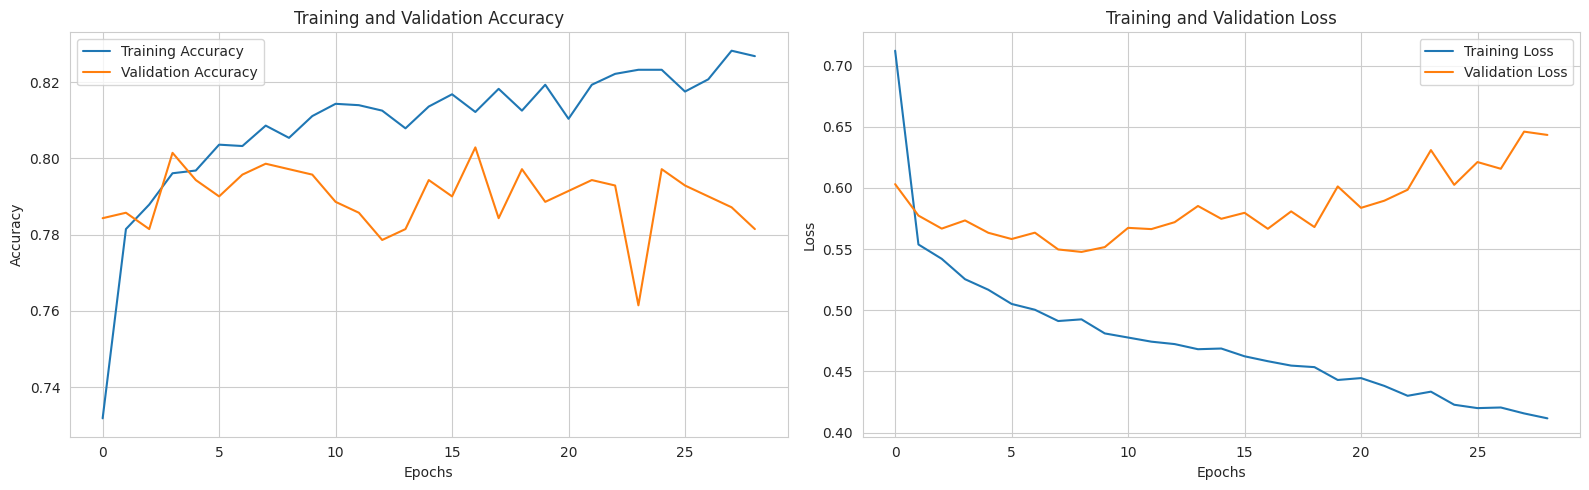

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.plot(history_fix9.history['accuracy'], label='Training Accuracy')
ax1.plot(history_fix9.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.set_title('Training and Validation Accuracy')

ax2.plot(history_fix9.history['loss'], label='Training Loss')
ax2.plot(history_fix9.history['val_loss'], label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.set_title('Training and Validation Loss')

plt.tight_layout()

plt.show()

Uji model fix 4 dengan data test

In [ ]:
y_pred = model_fix12.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Sensitivity / Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1-Score: {f1}')

test_loss, test_acc = model_fix12.evaluate(X_test, y_test, verbose=2)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8344748858447488
Sensitivity / Recall: 0.8344748858447488
Precision: 0.805539431932513
F1-Score: 0.815273755528996
28/28 - 0s - 7ms/step - accuracy: 0.8345 - loss: 0.4473


# Evaluasi model fix 3 yang sudah di download

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [ ]:
model = load_model('model_lstm_fix.h5')
y_test_1d = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


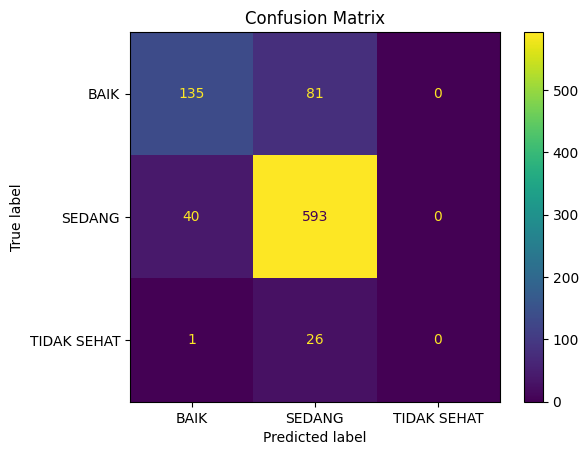

In [ ]:
y_pred_proba = model.predict(X_test)

y_pred_1d = np.argmax(y_pred_proba, axis=1)

target_names = ['BAIK', 'SEDANG', 'TIDAK SEHAT']
cm = confusion_matrix(y_test_1d, y_pred_1d)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()


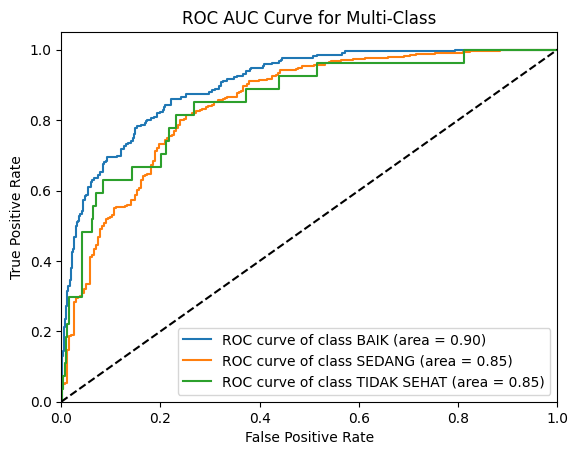

In [ ]:
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test_1d)

if y_test_binarized.shape[1] == 1:
    y_test_binarized = np.hstack((1 - y_test_binarized, y_test_binarized))

# ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {target_names[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()


In [ ]:
print(classification_report(y_test_1d, y_pred_1d, target_names=target_names))

              precision    recall  f1-score   support

        BAIK       0.77      0.62      0.69       216
      SEDANG       0.85      0.94      0.89       633
 TIDAK SEHAT       0.00      0.00      0.00        27

    accuracy                           0.83       876
   macro avg       0.54      0.52      0.53       876
weighted avg       0.80      0.83      0.81       876



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Sensitivity / Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1-Score: {f1}')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.8310502283105022
Sensitivity / Recall: 0.8310502283105022
Precision: 0.8012822451521082
F1-Score: 0.812750923263385


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


28/28 - 1s - 36ms/step - accuracy: 0.8311 - loss: 0.4502


tes dengan 1 data

In [ ]:
data_baru = pd.DataFrame([
    [34.0, 5.0, 23.0, 26.0, 12.0],
    [55.0, 10.0, 32.0, 23.0, 16.0],
    [45.0, 4.0, 33.0, 9.0, 17.0],
    [28.0, 5.0, 29.0, 10.0, 12.0],
    [38.0, 6.0, 28.0, 15.0, 10.0],
    [35.0, 5.0, 33.0, 17.0, 17.0],
    [54.0, 5.0, 38.0, 17.0, 18.0],
], columns=['pm10', 'so2', 'co', 'o3', 'no2'])

In [ ]:
scaler = StandardScaler()
data_baru = scaler.fit_transform(data_baru)
print(data_baru[:10])

[[-0.75992544 -0.3904344  -1.79009753  1.60800476 -0.88040878]
 [ 1.43044789  2.34260643  0.26037782  1.08849553  0.48911599]
 [ 0.38741297 -0.93704257  0.48820842 -1.33588088  0.83149718]
 [-1.3857464  -0.3904344  -0.42311396 -1.16271114 -0.88040878]
 [-0.34271147  0.15617376 -0.65094455 -0.29686242 -1.56517116]
 [-0.65562195 -0.3904344   0.48820842  0.04947707  0.83149718]
 [ 1.3261444  -0.3904344   1.62736139  0.04947707  1.17387837]]


In [ ]:
sample = np.expand_dims(data_baru, axis=0)

In [ ]:
predicted_probs = model.predict(sample)
predicted_class = np.argmax(predicted_probs, axis=1)[0]

# Mapping label
label_mapping = {0: 'BAIK', 1: 'SEDANG', 2: 'TIDAK SEHAT'}
print(f"Probabilitas Prediksi: {predicted_probs}")
print(f"Label Prediksi (angka): {predicted_class}")
print(f"Label Prediksi (teks): {label_mapping[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Probabilitas Prediksi: [[0.12297273 0.8376812  0.0393461 ]]
Label Prediksi (angka): 1
Label Prediksi (teks): SEDANG
